In this problem we investigate the randomness of the particle ﬁlter.
Consider the following system:
$$
x(k)=x(k-1)^3+v(k-1) \\
z(k)=x(k)^3+w(k)
$$
where $x(0)$,$\{v(\cdot)\}$,$\{w(\cdot)\}$ are independent, and each is drawn from a uniform distribution in the range $[-1,1]$. At $k=1$, you make the observation $z(1)=0.5$.

We will implement a particle ﬁlter with $N_p$ particles, and use this to approximate the MMSE estimator for the distribution $f(x(1)|z(1))$ (by taking the average of the particles after the resampling step) to compute its estimate. For each of $N_p\in\{10,10^2,10^3\}$ run the particle filter $10^3$ times, and record the ﬁnal estimate for each run (this should be diﬀerent, because each run is generated using diﬀerent random particles).

Make a single graph, with three histograms on it overlaid, showing the distribution of the ﬁnal estimate.

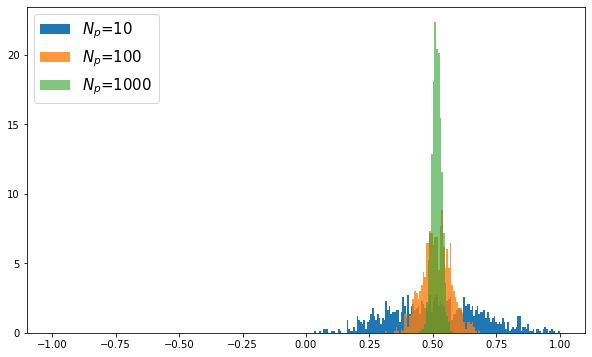

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Np = [10, 100, 1000]
n = 1000

MMSE = np.empty((len(Np), n))

for i in range(len(Np)):
    # Initialization
    particles = np.random.uniform(-1, 1, (Np[i], n))
    
    # Prior Update
    v = np.random.uniform(-1, 1, (Np[i], n))
    particles = particles ** 3 + v

    # Measurement Update
    z = 1
    fzx = (abs(z - particles ** 3) <= 1) / 2
    alpha = 1 / (np.sum(fzx, axis = 0) + 1.e-300) # avoid boundary error
    beta = alpha * fzx

    # Resampling
    r = np.random.uniform(0, 1, (Np[i], n))
    cumsum = np.cumsum(beta, axis = 0)
    cumsum[Np[i] - 1, :] = 1 # avoid boundary error
    for j in range(n):
        idx = np.searchsorted(cumsum[:, j], r[:, j])
        particles[:, j] = particles[:, j][idx]
        
    # Store MMSE estimators
    MMSE[i, :] = np.mean(particles, axis = 0)
    
plt.figure(figsize = (10, 6))
for i in range(len(Np)):
    plt.hist(MMSE[i, :], bins = 300, range = (-1, 1), density = True, label = r'$N_p$=%d'%(Np[i]), alpha = 1 - 0.2 * i)
    
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()